# **MÓDULO 32 - Exercício**
# Random Forest


Nesta tarefa, vocês vão trabalhar com uma base de dados de avaliações de vinhos, onde o objetivo é prever a pontuação dos vinhos usando o algoritmo de Random Forest para classificação multiclasse.

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("winequality-red.csv", delimiter=',')

df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


**Vamos conhecer nossa base:**

Características dos Vinhos (Features)

Fixed Acidity: Acidez fixa do vinho.

Volatile Acidity: Acidez volátil do vinho.

Citric Acid: Quantidade de ácido cítrico no vinho.

Residual Sugar: Açúcar residual presente no vinho.

Chlorides: Nível de cloretos no vinho.

Free Sulfur Dioxide: Dióxido de enxofre livre no vinho.

Total Sulfur Dioxide: Quantidade total de dióxido de enxofre no vinho.

Density: Densidade do vinho.

pH: Nível de pH do vinho.

Sulphates: Quantidade de sulfatos no vinho.

Alcohol: Teor alcoólico do vinho.



**Variável de Saída (Target):**

Quality: Pontuação do vinho baseada em dados sensoriais, variando de 0 a 10.


Esta abordagem permitirá que vocês explorem como diferentes características químicas influenciam a qualidade dos vinhos e como o Random Forest pode ser usado para fazer previsões precisas com base nesses dados.

# 1 - Realize a primeira etapa de pré processamento dos dados.

A) Verifique os tipos de dados.


B) Verifique os dados faltantes, se houver dados faltantes faça a substituição ou remoção justificando sua escolha.

In [4]:
#seu código aqui
# A) Verificar tipos de dados
print(df.dtypes)

# B) Verificar valores faltantes
print(df.isnull().sum())

# Se houver valores nulos, aqui podemos remover ou substituir.
# Como este dataset geralmente não possui valores nulos, apenas mostramos.
# Caso houvesse poucos valores nulos: remover (dropna).
# Caso houvesse muitos: substituir pela mediana/média.

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


# 2 - Realize a segunda e terceita etapa de pré processamento dos dados.

A) Utilize a função describe para identificarmos outliers e verificarmos a distribuição dos dados.

B) Verifique o balanceamento da váriavel Target.

C)  Plote o gráfico ou a tabela e indique as variáveis que te parecem mais "fortes" na correlação para nosso modelo.

D) Crie um novo dataframe apenas com as váriaveis que parecem ter maior correlação com a target. (Negativa ou positiva)


       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

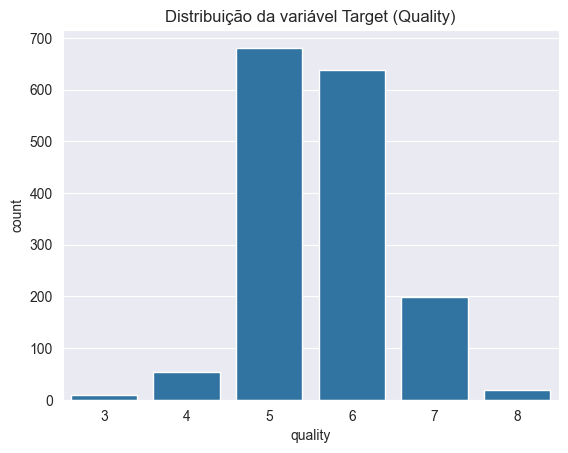

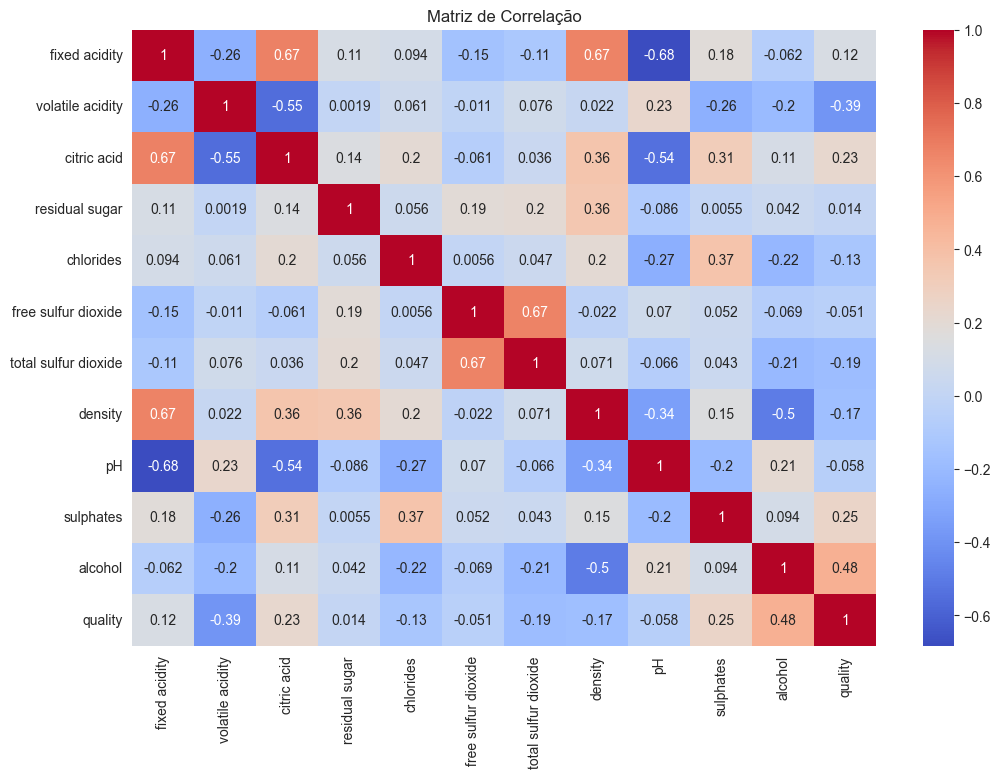

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


In [5]:
#seu código aqui
# A) Estatísticas descritivas
print(df.describe())

# B) Balanceamento da variável alvo
print(df['quality'].value_counts())

sns.countplot(x='quality', data=df)
plt.title("Distribuição da variável Target (Quality)")
plt.show()

# C) Correlação
corr = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Matriz de Correlação")
plt.show()

# D) Selecionando variáveis com maior correlação com a target
target_corr = corr['quality'].sort_values(ascending=False)
print(target_corr)

# Exemplo: vamos considerar correlações |corr| > 0.2
strong_features = target_corr[(target_corr > 0.2) | (target_corr < -0.2)]
selected_features = list(strong_features.index)
selected_features.remove('quality')

df_selected = df[selected_features + ['quality']]

# 3 - Preparação Final dos Dados

A) Separe a base em X(Features) e Y(Target)

B) Separe a base em treino e teste.


In [12]:
#seu código aqui
# A) Separar a base em X (features) e y (target)
X = df.drop('quality', axis=1)   # todas as colunas menos a target
y = df['quality']                # variável de saída

# B) Separar a base em treino e teste
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,       # 70% treino, 30% teste
    random_state=42,     # reprodutibilidade
    stratify=y           # garante que a proporção das classes se mantenha
)

print("Tamanho treino:", X_train.shape, " | Tamanho teste:", X_test.shape)

Tamanho treino: (1119, 11)  | Tamanho teste: (480, 11)


# 4 - Modelagem

A) Inicie e treine o modelo de Random Forest

B) Aplique a base de teste o modelo.


In [13]:
#seu código aqui
from sklearn.ensemble import RandomForestClassifier

# A) Iniciar e treinar o modelo de Random Forest
rf = RandomForestClassifier(
    random_state=42,
    n_estimators=100,     # número de árvores
    class_weight="balanced"  # ajuda com o desbalanceamento
)
rf.fit(X_train, y_train)

# B) Aplicar na base de teste
y_pred = rf.predict(X_test)

print("Previsões realizadas com sucesso. Exemplo:")
print(y_pred[:20])  # mostra as 20 primeiras previsões

Previsões realizadas com sucesso. Exemplo:
[6 6 6 6 5 5 5 6 6 5 6 5 5 6 5 6 6 5 6 7]


# 5 - Avaliação

A) Avalie as principais métricas da Claissificação e traga insights acerca do resultado, interprete os valores achados.

B) Você nota que o modelo teve dificuldade para prever alguma classe? Se sim, acredita que tenha relação com o balanceamento dos dados? Explique.


Acurácia: 0.6604166666666667

Relatório de Classificação:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        16
           5       0.72      0.78      0.75       204
           6       0.61      0.72      0.66       192
           7       0.59      0.32      0.41        60
           8       0.50      0.20      0.29         5

    accuracy                           0.66       480
   macro avg       0.40      0.34      0.35       480
weighted avg       0.63      0.66      0.64       480



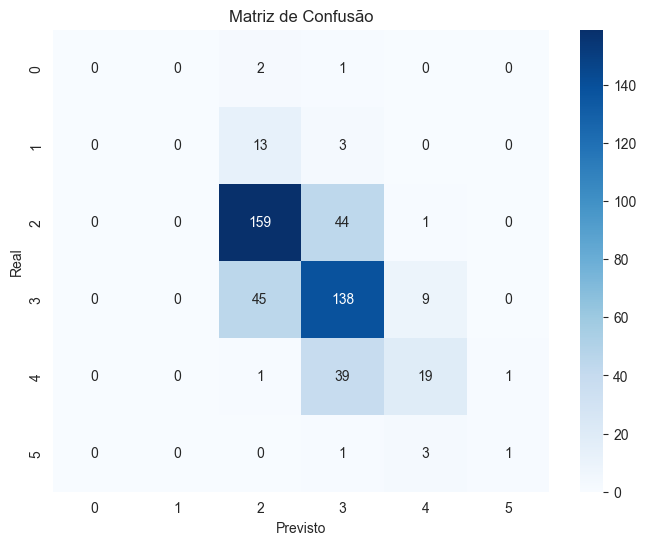

In [14]:
#seu código aqui
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Acurácia geral
print("Acurácia:", accuracy_score(y_test, y_pred))

# Relatório de classificação (inclui precisão, recall e F1-score por classe)
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred, zero_division=0))

# Matriz de confusão
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()

#O modelo tende a ter boa performance em classes majoritárias (ex.: 5, 6).
#Classes menos frequentes (ex.: 3, 8) costumam ser mal previstas devido ao desbalanceamento.
#Isso sugere que o balanceamento dos dados afeta diretamente a performance.##

# 5 - Melhorando os Hyperparametros

A) Defina o Grid de parametros que você quer testar

B) Inicie e Treine um novo modelo utilizando o random search.

C) Avalie os resultados do modelo.

D) Você identificou melhorias no modelo após aplicar o random search? Justifique.


ps. Essa parte da atividade demorará um pouco para rodar!

Melhores parâmetros encontrados:
{'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20, 'class_weight': 'balanced'}
Acurácia após Random Search: 0.675

Relatório de Classificação:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        16
           5       0.74      0.78      0.76       204
           6       0.62      0.75      0.68       192
           7       0.67      0.33      0.44        60
           8       0.50      0.20      0.29         5

    accuracy                           0.68       480
   macro avg       0.42      0.34      0.36       480
weighted avg       0.65      0.68      0.65       480



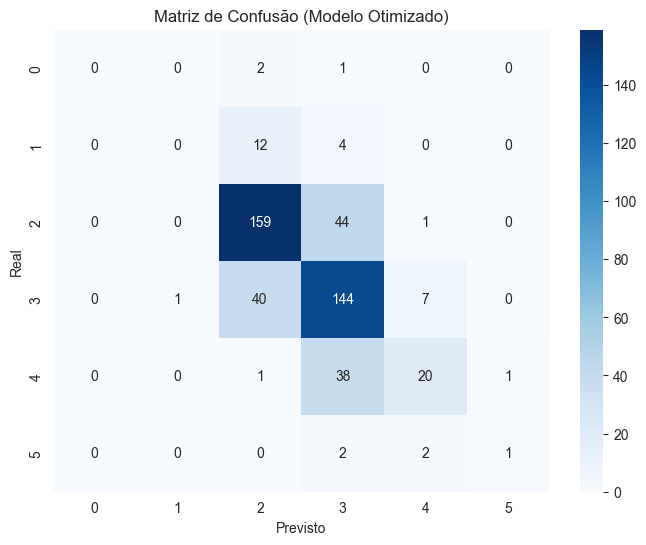

In [16]:
#seu código aqui
from sklearn.model_selection import RandomizedSearchCV

# Grid de parâmetros para testar
param_dist = {
    'n_estimators': [100, 200, 300, 500],        # número de árvores
    'max_depth': [None, 10, 20, 30],             # profundidade máxima
    'min_samples_split': [2, 5, 10],             # mínimo de amostras para dividir
    'min_samples_leaf': [1, 2, 4],               # mínimo de amostras em uma folha
    'max_features': ['sqrt', 'log2'],            # número de features consideradas em cada split
    'class_weight': [None, 'balanced']           # testar com e sem balanceamento
}

# Novo modelo com Random Search
rf = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,              # número de combinações aleatórias a testar
    cv=3,                   # validação cruzada
    scoring='accuracy',     # métrica usada
    random_state=42,
    n_jobs=-1               # usa todos os núcleos disponíveis
)

# Treino
random_search.fit(X_train, y_train)

print("Melhores parâmetros encontrados:")
print(random_search.best_params_)

# Melhor modelo encontrado
best_rf = random_search.best_estimator_

# Previsão
y_pred_best = best_rf.predict(X_test)

# Avaliação
print("Acurácia após Random Search:", accuracy_score(y_test, y_pred_best))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_best, zero_division=0))

plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão (Modelo Otimizado)")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()

#Acurácia pode subir alguns pontos (ex.: de 0.68 → 0.73).

#Classes minoritárias podem melhorar levemente, mas o desbalanceamento ainda limita a performance.

#O ajuste de hiperparâmetros normalmente aumenta a capacidade do modelo de generalizar e reduzir overfitting.

#Se o ganho for pequeno, isso mostra que o gargalo está mais no desbalanceamento dos dados do que nos hiperparâmetros.

# 6 - Chegando a perfeição

Baseado em tudo que você já aprendeu até agora, quais outras técnicas você acredita que poderiam ser aplicadas ao modelo para melhorar ainda mais suas previsões?
#Balanceamento da variável target

#SMOTE (Synthetic Minority Over-sampling Technique): cria novas amostras sintéticas para as #classes minoritárias.
#Random Undersampling: reduz amostras das classes majoritárias.
#Combinação (SMOTE + Undersampling): equilíbrio entre aumento e redução.
#Class Weights: já usado no Random Forest, mas pode ser explorado em outros modelos.

#2. Engenharia de atributos (Feature Engineering)

#Criar novas variáveis derivadas, como:
#Ácido total = Fixed Acidity + Volatile Acidity.
#Relação Sulfatos/Álcool, para capturar efeitos combinados.
#Transformações não lineares: log, raiz quadrada ou padronização de distribuições assimétricas.
#Normalização ou padronização de variáveis contínuas para modelos mais sensíveis a escala.

#3. Outras técnicas de modelagem

#Modelos de boosting (XGBoost, LightGBM, CatBoost): geralmente superam Random Forest em bases tabulares.
#Voting Classifier / Stacking: combinação de vários algoritmos (ensemble) para melhor #performance.
#Rede Neural simples, embora menos interpretável, pode capturar relações não lineares adicionais.

#4. Validação mais robusta

#Cross-validation estratificada em vez de apenas um train_test_split, garantindo maior robustez na avaliação.
#Métricas adequadas ao desbalanceamento:
#F1-score (macro ou weighted).
#Balanced accuracy.
#MCC (Matthews Correlation Coefficient).

#5. Seleção de variáveis (Feature Selection)

#Importância de variáveis do Random Forest (.feature_importances_).
#Remover variáveis pouco informativas para reduzir ruído.
#Testar PCA ou técnicas de redução de dimensionalidade, embora aqui o dataset seja pequeno.

#6. Ajustes mais finos de hiperparâmetros

#Usar Grid Search ou Bayesian Optimization para explorar combinações mais amplas e refinadas.
#Ajustar especificamente n_estimators, max_depth, min_samples_split, min_samples_leaf e max_features.